# DCMD Example

In this notebook, we will be using the SpikerTools library to analyze some DCMD data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

We would like to determine the distribution of spikes around a certain stimulus.

The goal is to generate a PETH (peri-stimulus or peri-event time histogram). Let's get started!

First, we import spikertools. 

In [2]:

import spikertools as sp

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Next, we create a Session object using our data file! Just add the path to the filename in the Session() initializer as shown below. 

Since we will be manually adding events, add a second blank argument "" to indicate that there are no events specified.

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

In [3]:
dcmd = sp.Session("dcmd_example_data\BYB_Recording_2016-07-29_16.29.37.wav", "")

No event file specified


First, let's take a look at our data. What does it look like in general? How long is the session? These questions can be answered by plotting an overview of the Session using the plot_overview function. Since there are no events, we should set the show_events argument to False!

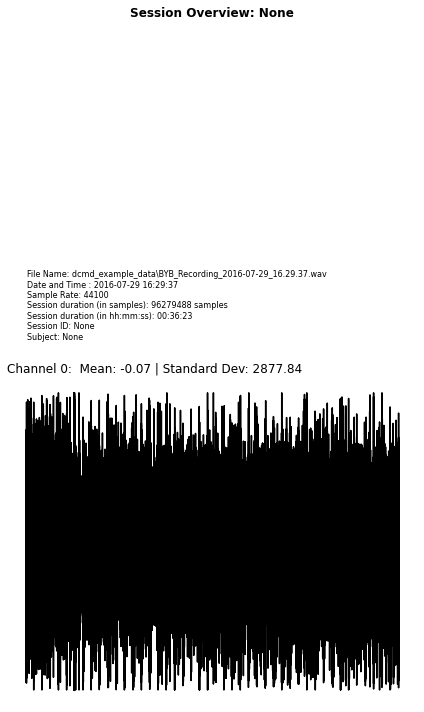

In [4]:
dcmd.plot_overview(show_events=False)

We can also plot a small interval of the data to see what it looks like with finer detail! The plot_interval function takes two required arguments: the first one is the channel index (here, we care about Channel 0). The second is a tuple with the time bounds. Here, I am plotting between 30 and 31 seconds, so I use (30,31).

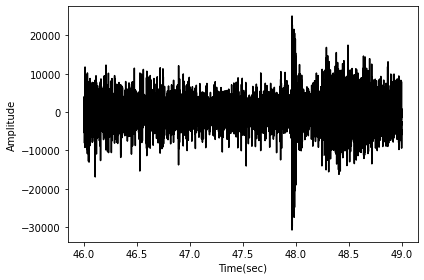

In [11]:
dcmd.plot_interval(0,(46,49))

Now, we need to add our events manually! 
We have two types of events: stimulus onset events and spike events.
Both can be extracted from the associated json file! 
Let's take a look using the code below!

In [17]:
import json
with open("dcmd_example_data\G30-072916-02.json") as f:
    data = json.load(f)
    trials = data["trials"]
    onsets = []
    spikes = []
    i=0
    for trial in trials:
        onset = trial["timeOfImpact"] + 47.8*i
        spike_data = trial["spikeTimestamps"]
        for spike in spike_data:
            spikes.append(spike + 47.8*i)
        i=i+1
        onsets.append(onset)
    





Now let's add the events to our session object!

In [19]:
events = {}
events["onsets"] = onsets
events["spikes"] = spikes
dcmd.set_events(events)

{'onsets': [46.73596,
  94.53572,
  142.33607999999998,
  190.13608,
  237.93596,
  284.60254,
  332.40247999999997,
  380.20241999999996,
  428.00248,
  475.80266,
  523.3692599999999,
  571.1691999999999,
  618.9690799999998,
  666.76914,
  714.56913,
  764.88599,
  812.6856799999999,
  860.4859899999999,
  908.28599,
  956.0863499999999,
  1001.98621,
  1049.7856,
  1097.58593,
  1145.3858699999998,
  1193.1858399999999,
  1240.60252,
  1288.40254,
  1336.20266,
  1384.0044899999998,
  1431.80217,
  1483.03625,
  1530.8351599999999,
  1578.6361299999999,
  1626.43464,
  1674.2361299999998,
  1719.3692,
  1767.1692,
  1814.9686499999998,
  1862.76731,
  1910.56938,
  1957.84458,
  2005.63588,
  2053.43594,
  2101.23582,
  2149.0358199999996],
 'spikes': [0.042472,
  0.049206,
  0.389546,
  0.442245,
  0.450544,
  0.484014,
  0.528594,
  0.594762,
  0.733107,
  0.863832,
  0.885419,
  0.892268,
  0.902517,
  0.947846,
  0.953401,
  0.99229,
  1.025601,
  1.058934,
  1.073764,
  1.1015

Now we can finally call our PETH function!

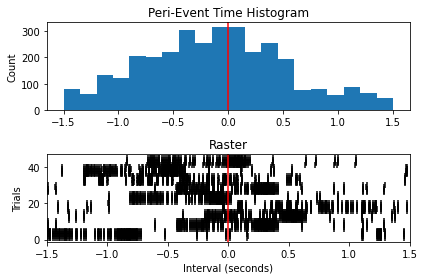

In [25]:
dcmd.plot_peth(0,(-1.5,1.5),"onsets", "spikes", 20)

We can see that most events are concentrated about the stimulus! 